In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import eurostat
import squarify 

In [7]:
year = 2020
color = ['red','blue','green','yellow']
states_dict = {'Rakousko':'AT', 'Belgie':'BE', 'Bulharsko':'BG','Kypr':'CY','České Republika':'CZ',
           'Německo':'DE','Dánsko':'DK','Estonsko':'EE','Špenělsko':'ES','Finsko':'FI','Francie':'FR',
           'Chorvatsko':'HR','Maďarsko':'HU','Irsko':'IE','Itálie':'IT','Litva':'LT','Lucembursko':'LU',
           'Lotyšsko':'LV','Malta':'MT','Nizozemsko':'NL','Polsko':'PL','Portugalsko':'PT',
           'Rumunsko':'RO','Švédsko':'SE','Slovinsko':'SI','Slovensko':'SK',}
states = ['AT','BE','BG','CY','CZ','DE','DK','EE','ES','FI','FR','HR','HU','IE','IT','LT','LU','LV',
          'MT','NL','PL','PT','RO','SE','SI','SK']

Načti a uprav dataframy

In [8]:
# Emise
df_sorce_emis = eurostat.get_data_df('env_air_gge')
df_emis = df_sorce_emis.rename(columns={'geo\\time': 'geo'})
df_emis = df_emis.query("src_crf == 'TOTX4_MEMONIA' and unit == 'MIO_T' and airpol == 'GHG'")

In [9]:
# Demografie
df_sorce_demo = eurostat.get_data_df('demo_pjan')
df_demo = df_sorce_demo.rename(columns={'geo\\time': 'geo'})
df_demo = df_demo.query("age == 'TOTAL' and sex == 'T'")

df_demo = df_demo.loc[df_demo['geo'].isin(states)]
df_demo = df_demo[["geo", year]]

In [10]:
# Emise
df_new = pd.DataFrame()
for item in df_emis['geo']:
    if item in states:
        df_new = df_new.append(df_emis.loc[df_emis['geo'] == item])

df_emis = df_new[["geo", year]]

In [11]:
# df_plot.sort_values(by=["geo"])

Spoj dataframy

In [12]:
df_merged = df_emis.merge(df_demo, on='geo') # tohle by měl být inner join - zeptat se Fandy
df_merged.rename(columns = {f'{year}_x':f'{year}_emis', f'{year}_y':f'{year}_popul'}, inplace = True)

Emise na obyvatele (nový sloupec do df)

In [13]:
df_merged['em_na_oby'] = (df_merged[f'{year}_emis'] * 1000000) / df_merged[f'{year}_popul']
# df_merged.sort_values('em_na_oby', ascending = False)

Kresli grafy

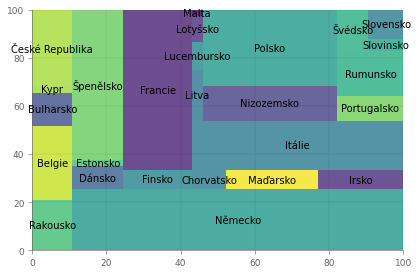

In [14]:
squarify.plot(sizes=df_merged[f'{year}_emis'], label=states_dict.keys(), alpha=0.8)
plt.show()

<AxesSubplot:title={'center':'Roční emise na obyvatele (CO2 ekv.)'}, xlabel='geo'>

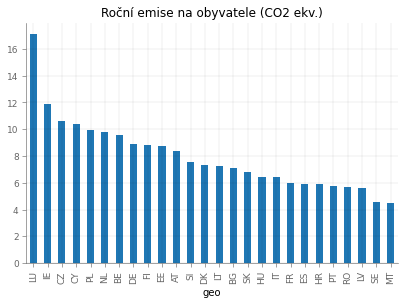

In [15]:
# Jak ten graf převrátim na stojato? a napsat názvy států do sloupečků?
df_merged = df_merged.set_index('geo')
df_merged['em_na_oby'].sort_values(ascending = False).plot.bar(title='Roční emise na obyvatele (CO2 ekv.)') 

In [16]:
# df_demo_sorce['sex'].unique()